In [1]:
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
import pickle
from joblib import dump, load

In [2]:
df = pd.read_csv('BTC2019-2024.csv')
df1 = df.reset_index()['Open']

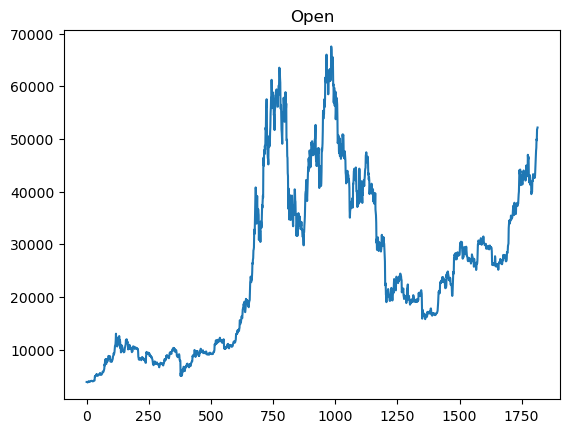

In [3]:
plt.plot(df1)
plt.title("Open")
plt.show()

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [5]:
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))


train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]


In [6]:
# 5. Tạo dataset cho mô hình
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [7]:
X_train.shape

(1351, 100)

### RandomForest

In [8]:
model=RandomForestRegressor()

In [9]:
# best_parameters

In [10]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [11]:
# Lưu mô hình vào file
with open('Model/rf.pkl', 'wb') as file:
    pickle.dump(model, file)

In [12]:
# Tải mô hình từ file
with open('Model/rf.pkl', 'rb') as file:
    rf_model = pickle.load(file)

In [13]:
train_predict = rf_model.predict(X_train)
y_pred = rf_model.predict(X_test)


In [14]:
y_pred

array([0.35939366, 0.35753531, 0.35113356, 0.33104497, 0.35393575,
       0.3512492 , 0.35122461, 0.33104798, 0.35474672, 0.33169237,
       0.33154683, 0.3304977 , 0.33058691, 0.33112709, 0.3311721 ,
       0.33096121, 0.32120275, 0.32952904, 0.33080632, 0.33059893,
       0.33037265, 0.33035007, 0.36657346, 0.42510287, 0.42832024,
       0.42953915, 0.42931527, 0.42945655, 0.4283895 , 0.42945884,
       0.4281854 , 0.42873965, 0.42833881, 0.42774551, 0.42769972,
       0.4281663 , 0.42864224, 0.42805485, 0.4275111 , 0.42724442,
       0.42752119, 0.42663477, 0.42681384, 0.42747966, 0.42720954,
       0.43214055, 0.42715889, 0.42649557, 0.42642862, 0.42635358,
       0.42706693, 0.42639326, 0.42593982, 0.42571779, 0.42565061,
       0.42563163, 0.41215171, 0.41385761, 0.4246321 , 0.41339358,
       0.42296337, 0.42441279, 0.41948202, 0.41441674, 0.42476755,
       0.4127214 , 0.41284948, 0.41063364, 0.4103837 , 0.41047882,
       0.41329896, 0.4253235 , 0.42561369, 0.42501755, 0.42547

In [15]:
# 11. Dự báo giá cho 30 ngày tiếp theo
x_input = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input[0])
lst_output = []
n_steps = 100
i = 0
while i < 30:
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps))
        yhat = rf_model.predict(x_input)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, n_steps))
        yhat = rf_model.predict(x_input)
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        i += 1

lst_output = np.array(lst_output).reshape(-1, 1)

### Bagging

In [16]:
from sklearn.ensemble import BaggingRegressor

In [17]:
# Xây dựng mô hình Bagged
bagged_rf = BaggingRegressor(estimator=rf_model, n_estimators=5, random_state=42)

In [18]:
# Huấn luyện mô hình
bagged_rf.fit(X_train, y_train)

BaggingRegressor(estimator=RandomForestRegressor(), n_estimators=5,
                 random_state=42)

In [19]:
#Lưu mô hình
dump(bagged_rf, 'Model/rf_bagging.joblib')

['Model/rf_bagging.joblib']

In [20]:
# Tải mô hình
bagged_rf = load('Model/rf_bagging.joblib')

In [21]:
#Dự đoán
bagged_train_predict = bagged_rf.predict(X_train)
bagged_y_pred = bagged_rf.predict(X_test)

In [22]:
bagged_y_pred

array([0.43257361, 0.43183413, 0.43157007, 0.43178619, 0.43183861,
       0.43198511, 0.43142641, 0.43135303, 0.43049842, 0.43073622,
       0.43004773, 0.42931975, 0.42916789, 0.42821109, 0.42876864,
       0.42840896, 0.42841177, 0.42846889, 0.42775448, 0.42770761,
       0.42658763, 0.42830765, 0.43132429, 0.43376668, 0.43488152,
       0.43572954, 0.43656214, 0.43713165, 0.43726871, 0.43732587,
       0.43720473, 0.43736968, 0.43723916, 0.43714937, 0.43711177,
       0.43934794, 0.43725749, 0.43735217, 0.43728416, 0.4373374 ,
       0.43761916, 0.43745444, 0.4374521 , 0.43732714, 0.43752614,
       0.44109458, 0.43758914, 0.4375801 , 0.43766897, 0.43761958,
       0.43775439, 0.43756794, 0.43744095, 0.43750438, 0.43755791,
       0.43774341, 0.43748335, 0.43734422, 0.43724504, 0.43751366,
       0.43738524, 0.43756864, 0.43760988, 0.43730129, 0.43744112,
       0.43763664, 0.43745517, 0.43739066, 0.43739295, 0.43746221,
       0.43737909, 0.43742084, 0.43766895, 0.43779633, 0.43767

In [23]:
# 11. Dự báo giá cho 30 ngày tiếp theo
x_input1 = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input1[0])
bagg_lst_output1 = []
n_steps = 100
i = 0
while i < 30:
    if len(temp_input) > 100:
        x_input1 = np.array(temp_input[1:])
        x_input1 = x_input1.reshape(1, -1)
        x_input1 = x_input1.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input1)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        bagg_lst_output1.extend(yhat.tolist())
        i += 1
    else:
        x_input1 = x_input1.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input1)
        temp_input.extend(yhat.tolist())
        bagg_lst_output1.extend(yhat.tolist())
        i += 1

bagg_lst_output1 = np.array(bagg_lst_output1).reshape(-1, 1)


In [24]:
# 11. Dự báo giá cho 60 ngày tiếp theo
x_input2 = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input2[0])
bagg_lst_output2 = []
n_steps = 100
i = 0
while i < 60:
    if len(temp_input) > 100:
        x_input2 = np.array(temp_input[1:])
        x_input2 = x_input2.reshape(1, -1)
        x_input2 = x_input2.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input2)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        bagg_lst_output2.extend(yhat.tolist())
        i += 1
    else:
        x_input2 = x_input2.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input2)
        temp_input.extend(yhat.tolist())
        bagg_lst_output2.extend(yhat.tolist())
        i += 1

bagg_lst_output2 = np.array(bagg_lst_output2).reshape(-1, 1)

In [25]:
# 11. Dự báo giá cho 90 ngày tiếp theo
x_input3 = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input3[0])
bagg_lst_output3 = []
n_steps = 100
i = 0
while i < 90:
    if len(temp_input) > 100:
        x_input3 = np.array(temp_input[1:])
        x_input3 = x_input3.reshape(1, -1)
        x_input3 = x_input3.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input3)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        bagg_lst_output3.extend(yhat.tolist())
        i += 1
    else:
        x_input3 = x_input3.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input3)
        temp_input.extend(yhat.tolist())
        bagg_lst_output3.extend(yhat.tolist())
        i += 1

bagg_lst_output3 = np.array(bagg_lst_output3).reshape(-1, 1)

### Đánh giá mô hình

In [26]:
#Đánh giá trên tập test
print("Chỉ số MSE trên tập test")
print("Random Forest:", round(metrics.mean_squared_error(y_test, y_pred), 4))
print("Bagging:", round(metrics.mean_squared_error(y_test, bagged_y_pred), 4))
test_rmse = np.sqrt(np.mean((bagged_y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# Tính MAPE
test_mape = np.mean(np.abs((bagged_y_pred - y_test) / y_test)) * 100
print('Testing MAPE:', test_mape)

Chỉ số MSE trên tập test
Random Forest: 0.0004
Bagging: 0.002
Testing RMSE: 0.044900478552476246
Testing MAPE: 9.015371011950785


### Trực quan

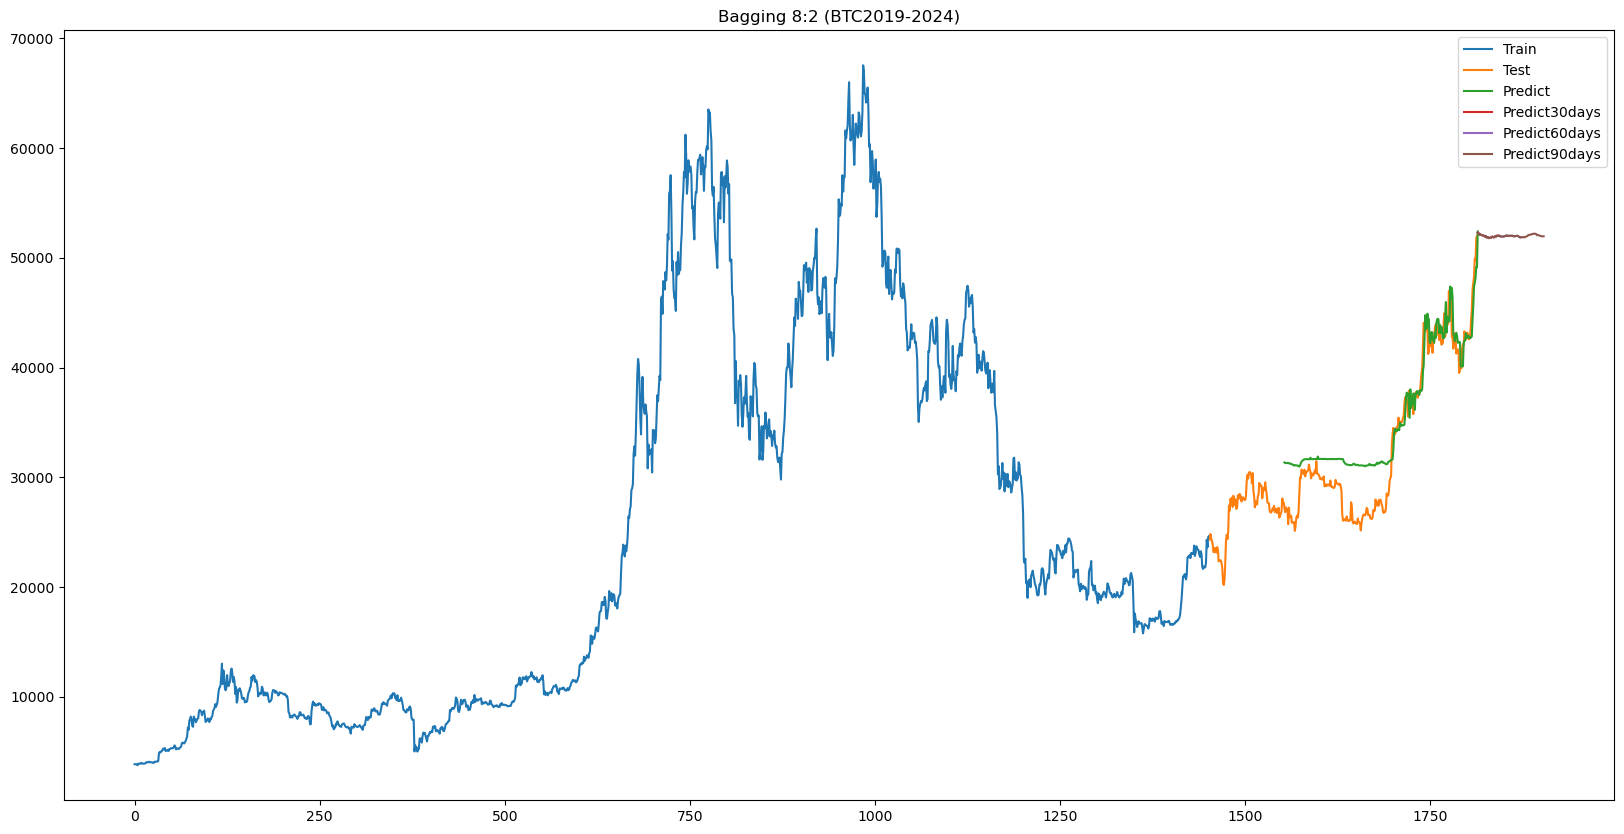

In [27]:
plt.figure(figsize=(20, 10))

plt.title('Bagging 8:2 (BTC2019-2024)')
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(bagged_y_pred.reshape(-1,1)))
prediect_data_index1 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index1,scaler.inverse_transform(bagg_lst_output1))
prediect_data_index2 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index2,scaler.inverse_transform(bagg_lst_output2))
prediect_data_index3 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index3,scaler.inverse_transform(bagg_lst_output3))
plt.legend(['Train','Test','Predict','Predict30days','Predict60days','Predict90days'])
plt.show()